In [1]:
import pandas as pd
import numpy as np

In [2]:
hr=pd.read_csv('C:/Users/Administrator/Desktop/Machine learning/with karthirmani/datasets/HR Analytics.csv')
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#the algorithm itself will pull out columns for u to analyse
#the target variable is attrition n its has 2 values..so we are gonna do binary classifcation

#hr['Attrition'].value_counts()[1] / (hr['Attrition'].value_counts()[0]+hr['Attrition'].value_counts()[1])*100
hr['Attrition'].unique()

array([1, 0], dtype=int64)

## Step 1. Identify balanced or imbalanced class

In [4]:
#prople leave the comapny is less than people who stay in the company
(hr['Attrition'].value_counts()/hr.shape[0])*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

## Step 2. Converting Categorical column to Numerical column

In [18]:
pd.get_dummies(hr['Gender']).head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [5]:
hr_dummies=pd.get_dummies(hr)
hr_dummies.head()
hr_dummies.shape

(1470, 56)

#### we have to have target variable and it shud be untouched but can have many input variables

### Gini Impurity (will be used on targetted column)

#### a node with a single impurity the gini impurity value is 0 but if the nodes ias mixed then gini impurity value is 0.5. [Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.] 

In [8]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(hr_dummies,test_size=0.3,random_state=100)

In [9]:
n_s=train.shape[0]

p_0=train[train['Attrition']==0].shape[0]/n_s
p_1=train[train['Attrition']==1].shape[0]/n_s

gi_train= 1 - np.square(p_0) - np.square(p_1)
gi_train

#train[train['Attrition']==0].shape
#train[train['Attrition']==1].shape

0.27190862461880494

#### a column(input) will be chosen if the gi is reduced as much as possible...so we check all input columns. A column which reduces gi as much as possible will be taken as input columns



## Step 3. Gini impurity on binary categorical columns

In [10]:
#we take the gender column to calculate gini impurity against attrition
train.columns
train['Gender_Female'].value_counts()

print('-------------TOTAL-------------------')
samples_left=train[train['Gender_Female']==0]
print(samples_left.shape)

samples_right=train[train['Gender_Female']==1]
print(samples_right.shape,'\n')

#among males people staying in the company
print('-------------MALE-------------------')
print(samples_left[samples_left['Attrition']==0].shape)
print(samples_left[samples_left['Attrition']==1].shape)

#among females people staying in the company
print('-------------FEMALE-------------------')
print(samples_right[samples_right['Attrition']==0].shape)
print(samples_right[samples_right['Attrition']==1].shape,'\n')



left_zero=samples_left[samples_left['Attrition']==0].shape[0]
left_one=samples_left[samples_left['Attrition']==1].shape[0]

right_zero=samples_right[samples_right['Attrition']==0].shape[0]
right_one=samples_right[samples_right['Attrition']==1].shape[0]

gi_left= 1 - np.square(left_zero/samples_left.shape[0]) - np.square(left_one/samples_left.shape[0])
gi_right= 1 - np.square(right_zero/samples_right.shape[0]) - np.square(right_one/samples_right.shape[0])

print('---------GI VALUE-------')
print(gi_left,gi_right,'\n')

gi_overall=(samples_left.shape[0]/train.shape[0]*gi_left)+(samples_right.shape[0]/train.shape[0]*gi_right)
print('--------OVERALL GI-----------')
print(gi_overall)



-------------TOTAL-------------------
(610, 56)
(419, 56) 

-------------MALE-------------------
(505, 56)
(105, 56)
-------------FEMALE-------------------
(357, 56)
(62, 56) 

---------GI VALUE-------
0.2850040311744155 0.2521516737772056 

--------OVERALL GI-----------
0.27162683219537664


In [11]:
#check the same on overtime

samples_left=train[train['OverTime_No']==0]
print(samples_left.shape)
samples_right=train[train['OverTime_No']==1]
print(samples_right.shape)

yes_0=samples_left[samples_left['Attrition']==0]
print(yes_0.shape)
yes_1=samples_left[samples_left['Attrition']==1]
print(yes_1.shape)

no_0=samples_right[samples_right['Attrition']==0]
print(no_0.shape)
no_1=samples_right[samples_right['Attrition']==1]
print(no_1.shape)

(289, 56)
(740, 56)
(197, 56)
(92, 56)
(665, 56)
(75, 56)


In [12]:
#step 1 and 2
unique=np.unique(train['MonthlyIncome'])
sort=np.sort(unique)
sort=pd.Series(sort)
len(sort)

968

In [13]:
#step 3
mid=sort.rolling(2).mean().dropna()
cuts=mid

In [14]:
#step 4

df_gi_cuts=pd.DataFrame(columns=['cut','gi'])

for cut in cuts:
    #cut=1030
    col='MonthlyIncome'
    ns=train.shape[0]

    s_left=train[train[col]<cut]
    s_right=train[train[col]>cut]

    p0_left=s_left[s_left['Attrition']==0].shape[0] / s_left.shape[0]
    p1_left=s_left[s_left['Attrition']==1].shape[0] / s_left.shape[0]
    gi_left=1 - np.square(p0_left) - np.square(p1_left)

    p0_right=s_right[s_right['Attrition']==0].shape[0] / s_right.shape[0]
    p1_right=s_right[s_right['Attrition']==1].shape[0] / s_right.shape[0]
    gi_right=1 - np.square(p0_right) - np.square(p1_right)

    gi_cut=(s_left.shape[0]/ns*gi_left)+(s_right.shape[0]/ns*gi_right)

    df_gi_cuts=df_gi_cuts.append({'cut':cut,'gi':gi_cut},ignore_index=True)

df_gi_cuts.sort_values(by='gi').head()

,cut,gi
202,2779.5,0.254494
203,2781.5,0.254687
185,2693.5,0.254709
143,2489.5,0.254749
199,2766.0,0.254780


### making the model

In [15]:
#python understands where the path of the file is and utilize it
import os
graphviz_path='C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ['PATH'] += os.pathsep + graphviz_path

In [16]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

In [17]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=100,max_depth=1)
model.fit(train[['MonthlyIncome']],train[['Attrition']])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

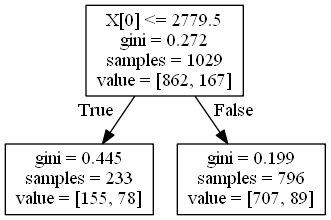

In [18]:
dot_data=StringIO()
tree.export_graphviz(model,
                    out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

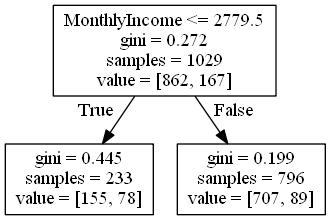

In [19]:
#to make this in a function

def draw_tree(model,columns):
    from sklearn import tree
    from sklearn.externals.six import StringIO
    import pydotplus
    from IPython.display import Image

    dot_data=StringIO()
    tree.export_graphviz(model,
                        out_file=dot_data,
                        feature_names=columns)
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

draw_tree(model,['MonthlyIncome'])

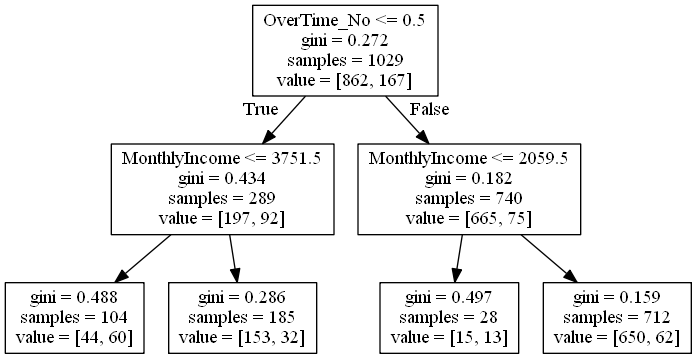

In [20]:
hr_dummies.columns
input_columns=['MonthlyIncome','OverTime_No','Gender_Female']

model=DecisionTreeClassifier(random_state=100,max_depth=2)
model.fit(train[input_columns],train['Attrition'])

draw_tree(model,input_columns)

In [21]:
#pred=model.predict(test[input_columns])
#pred

pred=model.predict_proba(test[input_columns])
pred

pred_prob=pd.DataFrame(model.predict_proba(test[input_columns]),columns=['Prob_0','Prob_1'])
pred_prob.head()

,Prob_0,Prob_1
0,0.912921,0.087079
1,0.423077,0.576923
2,0.912921,0.087079
3,0.827027,0.172973
4,0.827027,0.172973


#### to check the accuracy

In [22]:
from sklearn.metrics import accuracy_score

pred=model.predict(test[input_columns])
acc=accuracy_score(test['Attrition'],pred)
acc

0.8344671201814059

In [232]:
(test['Attrition']==pred).sum()/test.shape[0]*100

84.12698412698413

In [27]:
train_x=train.drop('Attrition',axis=1)
train_y=train['Attrition']

test_x=test.drop('Attrition',axis=1)
test_y=test['Attrition']

model=DecisionTreeClassifier(random_state=100,max_depth=1)
model.fit(train_x,train_y)
#draw_tree(model,train_x.columns)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [29]:
pred_test=model.predict(test_x)
pred_results=pd.DataFrame({'actual':test_y,'predicted':pred_test})

#(pred.results['actual']==pred_results['predicted'].sum())/test

### Confusion metric can be used for binary classifaction

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_results['actual'],pred_results['predicted'])

0.8412698412698413

In [31]:
#True Positive(TP)
pred_results.query('predicted==1 & actual==1').shape

(0, 2)

In [32]:
#True Negative(TN)
pred_results.query('predicted==0 & actual==0').shape

(371, 2)

In [33]:
#False Positive(FP)
pred_results.query('predicted==1 & actual==0').shape

(0, 2)

In [34]:
#False Negative(FN)
pred_results.query('predicted==0 & actual==1').shape

(70, 2)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
accuracy_score(pred_results['actual'],pred_results['predicted'])

0.8412698412698413

In [39]:
tn,fp,fn,tp=confusion_matrix(pred_results['actual'],pred_results['predicted']).ravel() #ravel converts 2d to 1d
print(classification_report(pred_results['actual'],pred_results['predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

#### Builds multiple classifiers then takes a polling. its also called as Ensemble Algorithms. The number of trees we grow is called hyper paramter . They are of two types: 1) Bagging 2) Boosting. It pulls out random rows and columns. 

In [49]:
seed=201
train,test=train_test_split(hr_dummies,test_size=0.3,random_state=100)

train_x=train.drop('Attrition',axis=1)
train_y=train['Attrition']

test_x=test.drop('Attrition',axis=1)
test_y=test['Attrition']

model=DecisionTreeClassifier(random_state=seed,max_depth=5)
model.fit(train_x,train_y)

print(model.predict([hr_dummies.loc[100].drop('Attrition')]))

[1]


In [160]:
train,test=train_test_split(hr_dummies,test_size=0.3,random_state=100)

train_x=train.drop('Attrition',axis=1)
train_y=train['Attrition']

test_x=test.drop('Attrition',axis=1)
test_y=test['Attrition']

In [159]:
population=pd.Series(list(range(100)))
population.sample(100,replace=True).nunique()

70

In [181]:
#Randomly pick rows
sample_1=train_x.sample(1029,replace=True)

#randomly pick columns
all_columns=pd.Series(train_x.columns)
ncols=int(np.sqrt(len(all_columns)))
print(ncols)
random_columns=all_columns.sample(ncols).values
random_columns

sample_1=sample_1[random_columns]

model=DecisionTreeClassifier()
model.fit(sample_1,train_y.loc[sample_1.index])
model.predict([test_x.iloc[1][random_columns]])[0]

7


0

In [183]:
prediction=[]
for i in range(300):

    sample_1=train_x.sample(1029,replace=True)

    all_columns=pd.Series(train_x.columns)
    ncols=int(np.sqrt(len(all_columns)))
    random_columns=all_columns.sample(ncols).values
    random_columns

    sample_1=sample_1[random_columns]

    model=DecisionTreeClassifier()
    model.fit(sample_1,train_y.loc[sample_1.index])
    pred=model.predict([test_x.iloc[1][random_columns]])[0]
    prediction.append(pred)
pd.Series(prediction).value_counts()

0    249
1     51
dtype: int64

### Applying Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
#in the recall column it
model_rf=RandomForestClassifier(random_state=100,n_estimators=300)
model_rf.fit(train_x,train_y)
pred=model_rf.predict(test_x)
print(accuracy_score(test_y,pred))
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.79      0.16      0.26        70

   micro avg       0.86      0.86      0.86       441
   macro avg       0.82      0.57      0.59       441
weighted avg       0.85      0.86      0.82       441



### Applying on the bank dataset

In [189]:
bank=pd.read_csv('C:/Users/Administrator/Desktop/Machine learning/with karthirmani/datasets/bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [190]:
bank.shape

(45211, 17)

#### check for balance or for imbalance

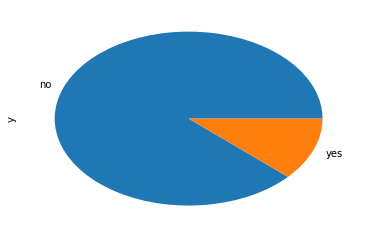

In [194]:
%matplotlib inline
(bank['y'].value_counts()/bank.shape[0]*100).plot.pie()

#### we want the dummies with the target variable kept aside cause we dont want two variables. Dummies only takes categoricacl columns

In [198]:
bank_dummies=pd.get_dummies(bank.drop('y',axis=1))
bank_dummies['y']=bank['y']
bank_dummies.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,no
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,no
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no


In [202]:
train,test=train_test_split(bank_dummies,test_size=0.3,random_state=100)
train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
18391,40,4853,31,234,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,no
13056,26,-378,8,165,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,no
13415,52,3440,9,194,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,no
21022,39,668,14,297,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,no
24510,50,830,17,71,1,138,2,0,0,0,...,0,0,1,0,0,1,0,0,0,no


In [211]:
train_x=train.drop('y',axis=1)
train_y=train['y']

test_x=test.drop('y',axis=1)
test_y=test['y']

In [212]:
model=DecisionTreeClassifier(random_state=100,max_depth=10)
model.fit(train_x,train_y)
pred=model.predict(test_x)
accuracy_score(test_y,pred)
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

          no       0.93      0.96      0.94     11985
         yes       0.59      0.42      0.49      1579

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



In [213]:
model_rf=RandomForestClassifier(n_estimators=300,random_state=100)
model_rf.fit(train_x,train_y)
pred=model_rf.predict(test_x)
accuracy_score(test_y,pred)
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     11985
         yes       0.65      0.41      0.50      1579

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.79      0.69      0.72     13564
weighted avg       0.89      0.91      0.90     13564



## Adaptive boosting (AdaBoost)

#### gives weighttage to each decision tree, if its predicted the values are correct the weightage will be positive and high and vice versa

### 1. Weighted sampling which random forest does

In [221]:
samples=list(range(5))
print(samples)

wgt_samples=np.random.choice(samples,size=10000,p=[0.3,0.3,0.1,0.2])
pd.Series(wgt_samples).value_counts()

[0, 1, 2, 3, 4]


ValueError: a and p must have same size

In [217]:
#pd.Series(np.random.choice(samples,size=100)).value_counts()

0    23
2    22
4    19
3    18
1    18
dtype: int64

### 2. Error rate for a single classifier

#### error rate = no: of mistakes / total no: of predictions

In [230]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(train_x,train_y)
pred=model.predict(train_x)
wrong_predictions=(pred!=train_y).sum()

total_predictions=train_x.shape[0]

error_rate=wrong_predictions/total_predictions
error_rate

0.09751319240370335

### Alpha T(classifier weight)

#### if error is 0.5 aplha_t is 0, if value>0.5 then alpha_t value is -ve and vice versa

In [231]:
alpha_t=0.5*np.log((1-error_rate)/error_rate)
alpha_t

1.1125831984615204

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


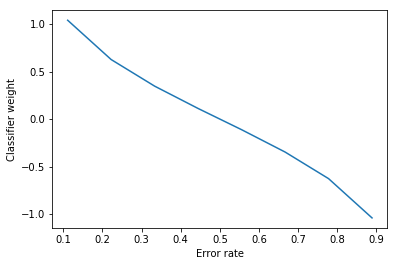

In [237]:
alpha_t=[]
ers=np.linspace(0,1,10)
for er in ers:
    alpha_ts=0.5*np.log((1-er)/er)
    alpha_t.append(alpha_ts)

import matplotlib.pyplot as plt
plt.plot(ers,alpha_t)
plt.xlabel('Error rate')
plt.ylabel('Classifier weight')
plt.show()